# 2<sup>η</sup> Εργασία - Η Στήλη της Ροζέτας του Ανθρώπινου Κεφαλαίου

Το παρόν αρχείο Jupyte Notebook, αποτελεί την δική μου λύση και ερμηνεία, των αποτελεσμάτων για την δεύτερη εκ των τριών τελικών εργασιών του διαδικτυακού μαθήματος, “Επιστήμη Δεδομένων και Εφαρμοσμένη Μηχανική Μάθηση με Python” που προσφέρει το Mathesis.

---
> Χάκα Κέβιν <br />
> Aπόφοιτος του <br />
> Τμήματος Επιστήμης των Υλικών <br />
> Πανεπιστημίου Πατρών

> kevihaka@gmail.com

In [1]:
#Εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
#Εισάγουμε τα δεδομένα από τα αντίστοιχα αρχεία

country_scores = pd.read_excel("patel-sandefur-human-capital-final-results.xlsx", "Country Scores")
WDI_data = pd.read_csv("WDI_data.csv")

In [3]:
#Συνενώνουμε τους δύο πίνακες σε ένα DataFrame

df = pd.merge(country_scores, WDI_data, on="Country Code")
df = df[df["Series Code"] == "NY.GDP.PCAP.PP.KD"].reset_index(drop = True)
df["Log(GDP)"] = np.log(df["2015 [YR2015]"].astype('float'))
df.head(3)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",Country Name,Series Name,Series Code,2015 [YR2015],Log(GDP)
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,United Arab Emirates,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,65975.3755468552,11.097037
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,Argentina,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688,9.857512
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,Armenia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.93364956571,9.011393


In [4]:
#Δημιουργούμε μια συνάρτηση η οποία δημιουργεί και εφαρμόζει ένα μοντέλο γραμμικής παλινδρόμησης

def linear_regression_model(x, y, axises_names = None):
    if axises_names == None: 
        if (x.name != None) and (y.name != None): axises_names = [x.name, y.name]
        else: axises_names = ["x","y"]
    xy = x.to_frame().join(y.to_frame(1), how = "inner").dropna().reset_index(drop = True)
    xy.columns = ["x","y"]
    model = smf.ols('y ~ x', data = xy).fit()
    xy.columns = axises_names
    print(stats.spearmanr(xy[axises_names[0]], xy[axises_names[1]]))
    sns.lmplot(x=axises_names[0], y=axises_names[1], data=xy, height=5, aspect=1.5)
    plt.show()
    print(model.summary())
    return xy[axises_names[0]].to_frame().join(model.resid.to_frame(f'{axises_names[1]} (Residualized)'))

SignificanceResult(statistic=0.6505076600204698, pvalue=8.243512060793219e-10)


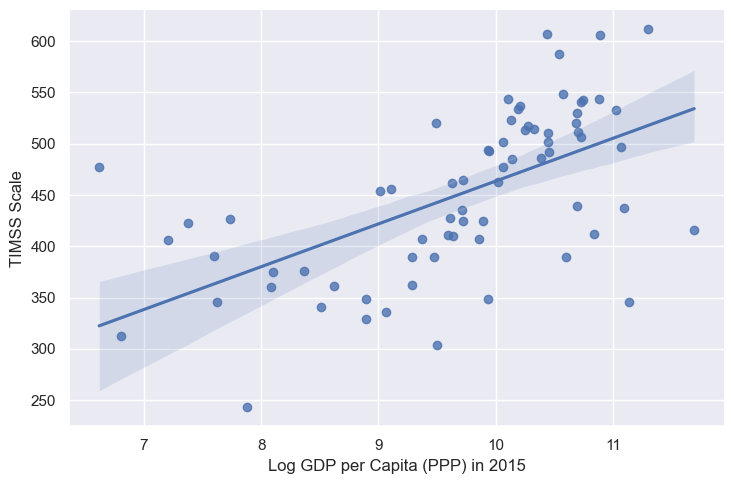

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           5.07e-08
Time:                        22:08:24   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.4

In [5]:
TIMSS_resid = linear_regression_model(df['Log(GDP)'], df['Median Math Score (TIMSS Scale, 4th Grade)'], 
                                      ['Log GDP per Capita (PPP) in 2015', 'TIMSS Scale'])

SignificanceResult(statistic=0.6764711507339786, pvalue=2.427725700137588e-10)


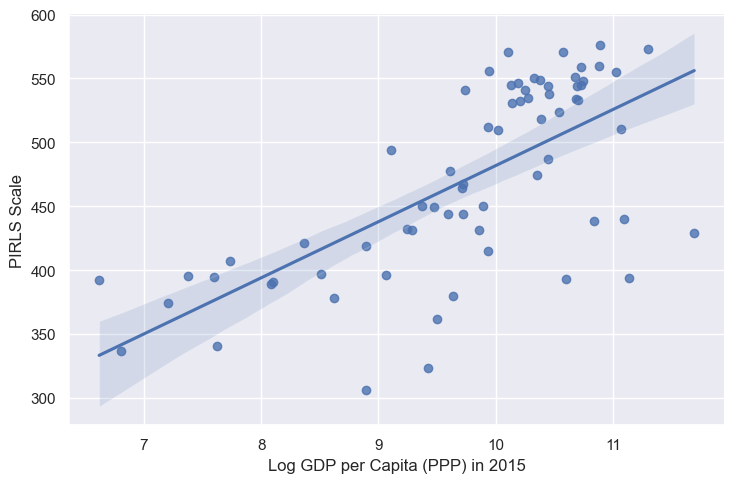

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.48e-10
Time:                        22:08:25   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.4

In [6]:
PIRLS_resid = linear_regression_model(df['Log(GDP)'], df['Median Reading Score (PIRLS Scale, 4th Grade)'], 
                                      ['Log GDP per Capita (PPP) in 2015', 'PIRLS Scale'])

Το πρώτο πράγμα που παρατηρεί κανείς για τα παραπάνω διαγράμματα, είναι ότι τα R<sup>2</sup> είναι σχετικά χαμηλά, δεν εξηγούν πολύ καλά τα δεδομένα, πράγμα που είναι και λίγο αναμενόμενο, γιατί το φαινόμενο είναι αρκετά σύνθετο για να εξηγηθεί από μια και μόνο μεταβλητή. Παρόλα αυτά, αυτό που φαίνεται καθαρά από τις κλίσεις των ευθειών όπως και από τους συντελεστές Spearman, είναι πως υπάρχει θετική συσχέτιση ανάμεσα στο λογάριθμο του κατά κεφαλήν ΑΕΠ (x άξονας) και στα σκορ TIMSS και PIRLS (y άξονας) αντίστοιχα στο κάθε διάγραμμα, τα οποία έχουν τιμή σημαντικότητας p-value πολύ χαμηλή. Αντίθετα τώρα το p-value των τεταγμένων είναι υψηλά όπως και οι διακυμάνσεις τους είναι υψηλές, πράγμα που εξηγεί τα χαμηλά R<sup>2</sup> και κάνει τα μοντέλα πρακτικά μη εφαρμόσιμα για προβλέψεις. 

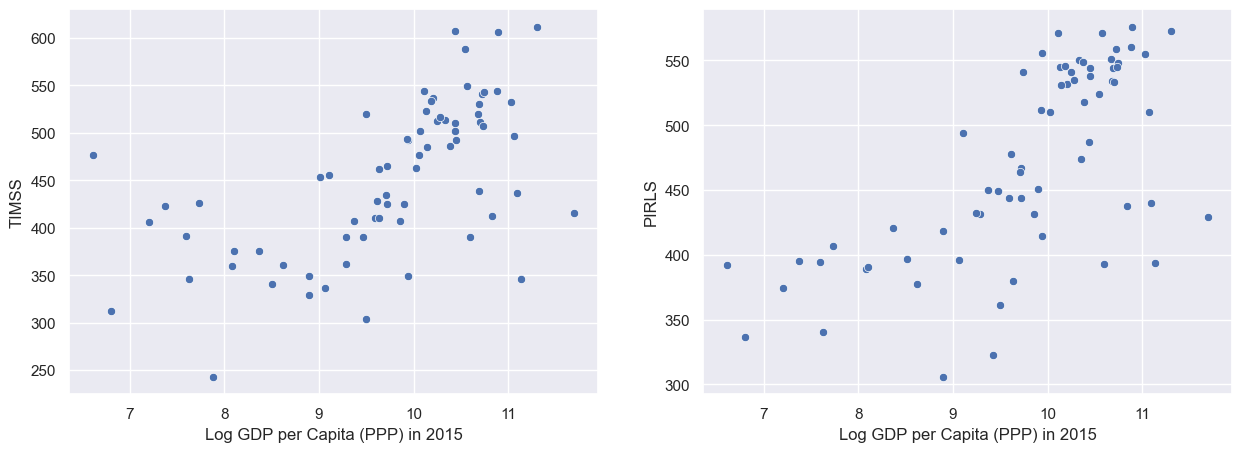

In [7]:
#Τα ζητούμενα διαγράμματα

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.scatterplot(x=df['Log(GDP)'], y=df['Median Math Score (TIMSS Scale, 4th Grade)'])
ax.set(xlabel='Log GDP per Capita (PPP) in 2015', ylabel='TIMSS')
plt.subplot(1,2,2)
ax = sns.scatterplot(x=df['Log(GDP)'], y=df['Median Reading Score (PIRLS Scale, 4th Grade)'])
ax.set(xlabel='Log GDP per Capita (PPP) in 2015', ylabel='PIRLS')
plt.show()

In [8]:
#Διαβάζουμε το αρχείο με τα έτη εκπαίδευσης ανά χωρά από το οποίο κρατάμε μόνο το έτος 2010

temp_df = pd.read_stata("BL2013_MF1599_v2.2.dta")
temp_df['year'] = pd.to_numeric(temp_df['year'], downcast='integer').reset_index(drop = True)
temp_df = temp_df[temp_df.year == 2010]
temp_df.rename(columns={"WBcode" : "Country Code"}, inplace=True)

In [9]:
#Συνενώνουμε τους δύο πίνακες σε ένα τελικό DataFrame

final_df = pd.merge(df, temp_df, on="Country Code")
final_df.head(3)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",Country Name,Series Name,Series Code,2015 [YR2015],...,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,region_code
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,United Arab Emirates,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,65975.3755468552,...,53.272114,35.680801,14.387889,8.537878,9.066772,5.076396,3.531861,0.458515,3998.0,Middle East and North Africa
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,Argentina,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688,...,48.648952,31.072559,11.178634,2.865633,9.510379,6.565071,2.664423,0.280885,30538.0,Latin America and the Caribbean
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,Armenia,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.93364956571,...,68.886536,57.121227,25.444443,15.033582,10.726531,4.622946,5.294024,0.809561,2452.0,Europe and Central Asia


SignificanceResult(statistic=0.6800115763071581, pvalue=5.0605248393128446e-11)


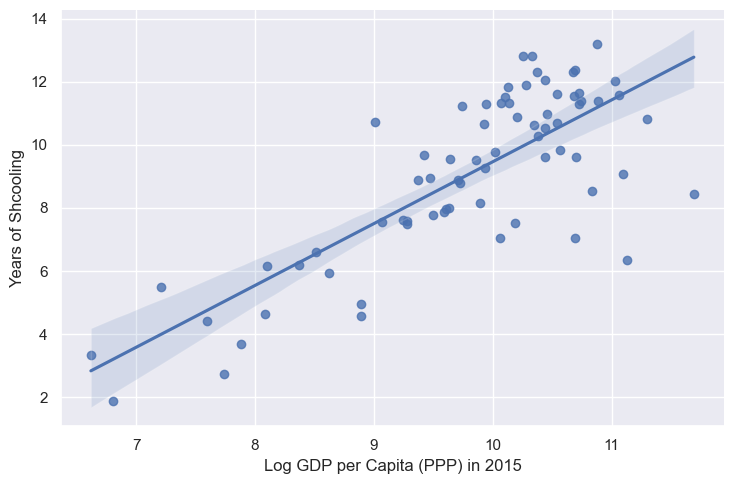

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     110.6
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           4.74e-16
Time:                        22:08:26   Log-Likelihood:                -138.89
No. Observations:                  72   AIC:                             281.8
Df Residuals:                      70   BIC:                             286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1310      1.838     -5.512      0.0

In [10]:
years_resid = linear_regression_model(final_df['Log(GDP)'], final_df['yr_sch'], 
                                      ['Log GDP per Capita (PPP) in 2015', 'Years of Shcooling'])

Στο παραπάνω διάγραμμα, φαίνεται να υπάρχει ισχυρή θετική σχέσει (βάση συντελεστή Spearman με p-value πολύ μικρό) ανάμεσα στο λογάριθμο του κατά κεφαλήν ΑΕΠ (x άξονας) και τα χρόνια εκπαίδευσης (y άξονας). Με το R<sup>2</sup> να είναι στο 0.612, ένα μεγάλο μέρος των δεδομένων μπορεί και εξηγείτε με αυτό το γραμμικό μοντέλο. Όπως παρατηρούμε και στο πινακάκι το p-value είναι αμελητέο και για την κλίση και για την τεταγμένη, το οποίο σημαίνει πως οι τιμές 1.96 ± 0.19 για την κλίση και -10.1 ± 1.8 για την τεταγμένη είναι στατιστικά σημαντικές. Αξιοσημείωτο είναι να παρατηρήσουμε πως η αύξηση μιας λογαριθμικής μονάδας του κατά κεφαλήν ΑΕΠ αυξάνει τα χρονιά εκπαίδευσης περίπου κατά 2, αν μας δυσκολεύει η λογαριθμική κλίμακα μπορούμε να πούμε πως η αύξηση του κατά κεφαλήν ΑΕΠ 2.7 περίπου φορές (χρησιμοποιούμε φυσικό λογάριθμο) αυξάνει κατά 2 τα χρόνια εκπαίδευσης.

In [11]:
#Δημιουργούμε τον πίνακα υπολοίπων

residuals = years_resid.merge(TIMSS_resid, 'left', 'Log GDP per Capita (PPP) in 2015')\
.merge(PIRLS_resid, 'left', 'Log GDP per Capita (PPP) in 2015')

SignificanceResult(statistic=0.5538461538461539, pvalue=1.703233853477048e-06)


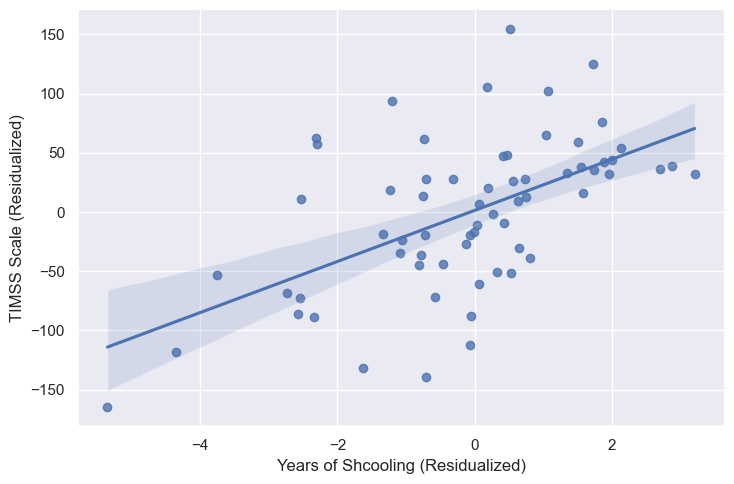

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     29.30
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.03e-06
Time:                        22:08:27   Log-Likelihood:                -350.69
No. Observations:                  65   AIC:                             705.4
Df Residuals:                      63   BIC:                             709.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4155      6.734      0.210      0.8

In [12]:
linear_regression_model(residuals["Years of Shcooling (Residualized)"], residuals["TIMSS Scale (Residualized)"]);

SignificanceResult(statistic=0.5567876344086021, pvalue=2.1490749293311313e-06)


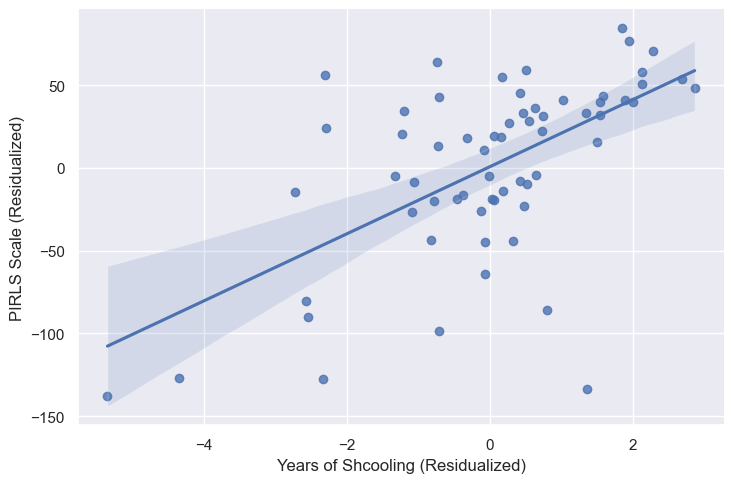

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.96
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.27e-07
Time:                        22:08:28   Log-Likelihood:                -326.38
No. Observations:                  63   AIC:                             656.8
Df Residuals:                      61   BIC:                             661.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6948      5.509      0.126      0.9

In [13]:
linear_regression_model(residuals["Years of Shcooling (Residualized)"], residuals["PIRLS Scale (Residualized)"]);

Στα παραπάνω διαγράμματα παρατηρούμε μικρά σχετικά R<sup>2</sup> και μεγάλα τυπικά σφάλματα στις τεταγμένες με p-values που τα κάνει αναξιόπιστα, παρ' όλ' αυτά οι συντελεστές Spearman και οι κλίσεις των ευθειών μαρτυρούν μια ξεκάθαρη θετική συσχέτιση ανάμεσα στα χρόνια εκπαίδευσης και τις αποδόσεις στα τεστ.

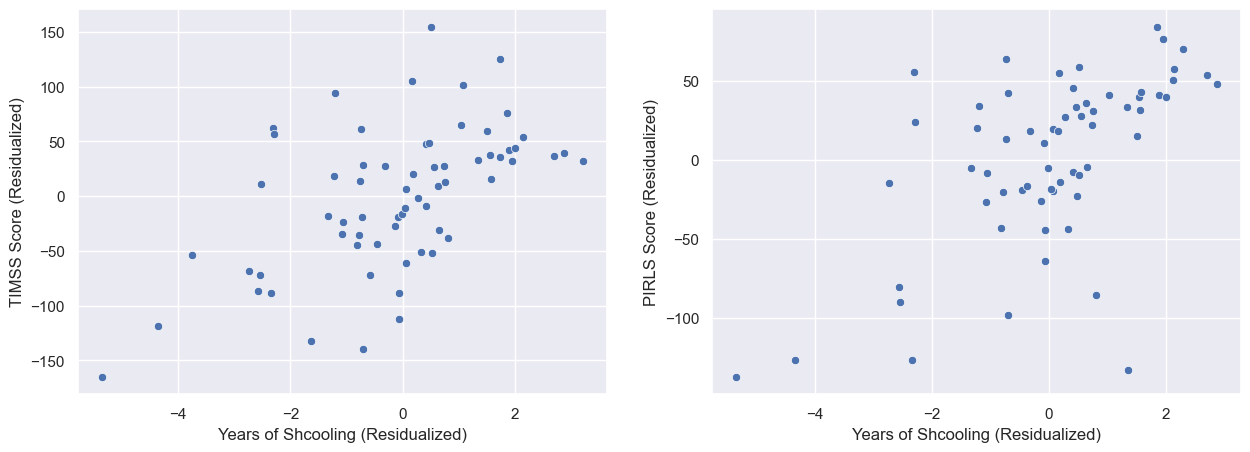

In [14]:
#Τα ζητούμενα διαγράμματα

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.scatterplot(x=residuals["Years of Shcooling (Residualized)"], y=residuals["TIMSS Scale (Residualized)"])
ax.set(xlabel='Years of Shcooling (Residualized)', ylabel='TIMSS Score (Residualized)')
plt.subplot(1,2,2)
ax = sns.scatterplot(x=residuals["Years of Shcooling (Residualized)"], y=residuals["PIRLS Scale (Residualized)"])
ax.set(xlabel='Years of Shcooling (Residualized)', ylabel='PIRLS Score (Residualized)')
plt.show()

Ως συνέπια των παραπάνω ευρημάτων, δηλαδή, της θετικής συσχέτισης ανάμεσα στα χρονιά εκπαίδευσης και του λογάριθμο του κατά κεφαλήν ΑΕΠ, όπως και της απόδοσης στα τεστ με τα χρόνια εκπαίδευσης, έχουμε το εξής φαινόμενο: Σε μια χωρά με υψηλό κατά κεφαλήν ΑΕΠ οι πολίτες επενδύουν περισσότερο στην εκπαίδευση, η οποία εκπαίδευση δημιουργεί πιο καταξιωμένους επαγγελματίες, οι οποίοι με την σειρά τους αποδίδουν στην χωρά (δικιά μου υπόθεση η οποία δεν προκύπτει από τα παραπάνω δεδομένα) με αποτέλεσμα να αυξάνει το κατά κεφαλήν ΑΕΠ, και ο κύκλος συνεχίζεται.